# Sep ??th, 2021

**Motivation**: Using N = 404 ROIs. Different group aggregation <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice

In [2]:
svinet_props = {
    'task': 'rest',
    'mode': 'bold',
    'metric': 'pearson',
    'match_metric': 'euclidean',
    'graph_type': 'real',
}
mice = Mice(Config(4), load_preproc=True)

In [4]:
len(mice.cfg.include_regions)

157

In [5]:
len(mice.cfg.include_regions) * 2

314

In [3]:
bad_rois = {
    '1-379': 1100,
    '0-1044': 1650,
    '0-59': 2200,
    '0-169': 2200,
    '0-564': 2200,
    '0-706': 2200,
    '0-1039': 2200,
    '1-149': 2200,
    '1-706': 2200,
    '1-1044': 2200,
    '0-149': 3850,
    '0-189': 4400,
    '0-609': 4400,
    '1-1139': 4400,
    '1-982': 6600,
    '0-333': 8800,
    '0-1120': 10450,
    '1-333': 11000,
    '0-1139': 12650,
    '1-1120': 14300,
    '1-531': 17050,
    '1-912': 18700,
    '0-912': 25300,
    '1-207': 26400,
    '0-939': 37400,
    '0-177': 51700,
    '1-177': 51700,
    '1-939': 53350,
    '0-207': 60500,
    '1-143': 60500,
    '0-143': 61050,
    '0-379': 62700
}

In [4]:
x = [int(e.split('-')[-1]) for e in sorted(bad_rois)]
x

[
    1039,
    1044,
    1120,
    1139,
    143,
    149,
    169,
    177,
    189,
    207,
    333,
    379,
    564,
    59,
    609,
    706,
    912,
    939,
    1044,
    1120,
    1139,
    143,
    149,
    177,
    207,
    333,
    379,
    531,
    706,
    912,
    939,
    982
]

In [8]:
z = [
    s['id'] for s in
    mice.allen['structure_tree'].get_structures_by_acronym(mice.cfg.include_regions)
]

In [9]:
set(z).intersection(set(x))

{609, 169, 564, 149, 59}

In [27]:
y = [i for i in x if i not in [149, 169, 564, 59, 609]]
y += [934]
y

[
    1039,
    1044,
    1120,
    1139,
    143,
    177,
    189,
    207,
    333,
    379,
    706,
    912,
    939,
    1044,
    1120,
    1139,
    143,
    177,
    207,
    333,
    379,
    531,
    706,
    912,
    939,
    982,
    934
]

In [23]:
df = pd.DataFrame({'a': [0, 1], 'b': [2, 3]})

In [25]:
ser = df.iloc[0]

In [29]:
print(ser.to_string())

a    0
b    2

In [27]:
print(ser)

a    0
b    2
Name: 0, dtype: int64

In [22]:
aadf.drop(columns=['b'])

,a
0,0
1,1


In [29]:
{k: v for k, v in bad_rois.items() if int(k.split('-')[1]) not in y}

{
    '0-59': 2200,
    '0-169': 2200,
    '0-564': 2200,
    '1-149': 2200,
    '0-149': 3850,
    '0-609': 4400
}

In [11]:
sorted(mice.cfg.include_regions)

[
    'ACB',
    'AD',
    'AHN',
    'AM',
    'AN',
    'AOBgl',
    'AOBgr',
    'AOBmi',
    'AON',
    'APN',
    'AV',
    'BLAa',
    'BLAp',
    'BLAv',
    'BMA',
    'CA1',
    'CA2',
    'CA3',
    'CENT',
    'CL',
    'CLA',
    'CM',
    'COAa',
    'COAp',
    'COPY',
    'CP',
    'CU',
    'CUL',
    'DCO',
    'DEC',
    'DG-mo',
    'DG-po',
    'DG-sg',
    'DN',
    'DP',
    'ECU',
    'ENTl',
    'ENTm',
    'EP',
    'FL',
    'FN',
    'FOTU',
    'FS',
    'GPe',
    'GPi',
    'IAD',
    'IGL',
    'IMD',
    'IP',
    'LA',
    'LAV',
    'LD',
    'LGd',
    'LGv',
    'LH',
    'LM',
    'LP',
    'LSc',
    'LSr',
    'LSv',
    'LZ',
    'MA',
    'MBmot',
    'MBsen',
    'MBsta',
    'MD',
    'MDRNd',
    'MDRNv',
    'MG',
    'MH',
    'MM',
    'MOB',
    'MPN',
    'MS',
    'MV',
    'MY-mot',
    'NDB',
    'NLL',
    'NLOT1',
    'NOD',
    'NOT',
    'NPC',
    'NTB',
    'NTS',
    'OT',
    'P-mot',
    'P-sat',
    'PA',
    'PAA',
    'PALc',
    'PAR',
    'PB',
    'PCN',
    'PF',
    'PFL',
    'PGRNd',
    'PGRNl',
    'PH',
    'PIR',
    'PMd',
    'PMv',
    'PO',
    'POL',
    'POR',
    'POST',
    'PPT',
    'PR',
    'PRE',
    'PRM',
    'PRP',
    'PSV',
    'PT',
    'PVHd',
    'PVR',
    'PVT',
    'PVZ',
    'PYR',
    'RAmb',
    'RE',
    'RT',
    'SCdg',
    'SCdw',
    'SCig',
    'SCiw',
    'SCop',
    'SCsg',
    'SF',
    'SGN',
    'SI',
    'SIM',
    'SMT',
    'SOCl',
    'SOCm',
    'SPA',
    'SPFm',
    'SPFp',
    'SPIV',
    'SPVC',
    'SPVI',
    'SPVO',
    'SUB',
    'SUM',
    'SUV',
    'TM',
    'TR',
    'TRS',
    'TT',
    'UVU',
    'VAL',
    'VCO',
    'VM',
    'VMH',
    'VPL',
    'VPLpc',
    'VPM',
    'VPMpc',
    'sAMY'
]

In [15]:
33 % 32

1

In [23]:
mice.allen['structure_tree'].get_structures_by_acronym(['ENTmv'])

[
    {
        'acronym': 'ENTmv',
        'graph_id': 1,
        'graph_order': 517,
        'id': 934,
        'name': 'Entorhinal area, medial part, ventral zone',
        'structure_id_path': [997, 8, 567, 688, 695, 1089, 822, 909, 934],
        'structure_set_ids': [687527945, 184527634, 12],
        'rgb_triplet': [50, 184, 37]
    }
]

In [8]:
collections.Counter(x)

Counter({
    1039: 1,
    1044: 2,
    1120: 2,
    1139: 2,
    143: 2,
    149: 2,
    169: 1,
    177: 2,
    189: 1,
    207: 2,
    333: 2,
    379: 2,
    564: 1,
    59: 1,
    609: 1,
    706: 2,
    912: 2,
    939: 2,
    531: 1,
    982: 1
})

In [9]:
mice.allen['structure_tree'].get_structures_by_id(list(collections.Counter(x)))

[
    {
        'acronym': 'GR',
        'graph_id': 1,
        'graph_order': 945,
        'id': 1039,
        'name': 'Gracile nucleus',
        'structure_id_path': [997, 8, 343, 1065, 354, 386, 720, 1039],
        'structure_set_ids': [
            112905828,
            691663206,
            687527945,
            12,
            688152367,
            184527634,
            167587189,
            114512891
        ],
        'rgb_triplet': [255, 165, 210]
    },
    {
        'acronym': 'PP',
        'graph_id': 1,
        'graph_order': 656,
        'id': 1044,
        'name': 'Peripeduncular nucleus',
        'structure_id_path': [997, 8, 343, 1129, 549, 864, 1044],
        'structure_set_ids': [
            112905828,
            691663206,
            687527945,
            688152363,
            12,
            184527634,
            167587189
        ],
        'rgb_triplet': [255, 128, 132]
    },
    {
        'acronym': 'IAM',
        'graph_id': 1,
        'graph_order': 680,
        'id': 1120,
        'name': 'Interanteromedial nucleus of the thalamus',
        'structure_id_path': [997, 8, 343, 1129, 549, 856, 239, 1120],
        'structure_set_ids': [
            112905828,
            691663206,
            687527945,
            688152363,
            12,
            184527634,
            167587189
        ],
        'rgb_triplet': [255, 144, 159]
    },
    {
        'acronym': 'NLOT3',
        'graph_id': 1,
        'graph_order': 425,
        'id': 1139,
        'name': 'Nucleus of the lateral olfactory tract, layer 3',
        'structure_id_path': [997, 8, 567, 688, 695, 698, 619, 1139],
        'structure_set_ids': [184527634, 12, 691663206],
        'rgb_triplet': [149, 228, 200]
    },
    {
        'acronym': 'AMBv',
        'graph_id': 1,
        'graph_order': 972,
        'id': 143,
        'name': 'Nucleus ambiguus, ventral division',
        'structure_id_path': [997, 8, 343, 1065, 354, 370, 135, 143],
        'structure_set_ids': [184527634, 12, 691663206],
        'rgb_triplet': [255, 179, 217]
    },
    {
        'acronym': 'PVT',
        'graph_id': 1,
        'graph_order': 692,
        'id': 149,
        'name': 'Paraventricular nucleus of the thalamus',
        'structure_id_path': [997, 8, 343, 1129, 549, 856, 571, 149],
        'structure_set_ids': [
            112905828,
            691663206,
            687527945,
            10,
            688152363,
            12,
            184527634,
            167587189,
            114512891
        ],
        'rgb_triplet': [255, 144, 159]
    },
    {
        'acronym': 'PRP',
        'graph_id': 1,
        'graph_order': 996,
        'id': 169,
        'name': 'Nucleus prepositus',
        'structure_id_path': [997, 8, 343, 1065, 354, 370, 154, 169],
        'structure_set_ids': [
            112905828,
            691663206,
            687527945,
            12,
            688152367,
            184527634,
            167587189,
            114512891
        ],
        'rgb_triplet': [255, 179, 217]
    },
    {
        'acronym': 'NR',
        'graph_id': 1,
        'graph_order': 995,
        'id': 177,
        'name': 'Nucleus of Roller',
        'structure_id_path': [997, 8, 343, 1065, 354, 370, 154, 177],
        'structure_set_ids': [
            112905828,
            691663206,
            687527945,
            12,
            688152367,
            184527634,
            167587189
        ],
        'rgb_triplet': [255, 179, 217]
    },
    {
        'acronym': 'RH',
        'graph_id': 1,
        'graph_order': 697,
        'id': 189,
        'name': 'Rhomboid nucleus',
        'structure_id_path': [997, 8, 343, 1129, 549, 856, 51, 189],
        'structure_set_ids': [
            112905828,
            691663206,
            687527945,
            688152363,
            12,
            184527634,
            167587189
        ],
        'rgb_triplet': [255, 144, 159]
    },
    {
        'acronym': 'AP',
        'gra

(149, 169, 564, 59, 609)

In [21]:
bad_rois[f"0-{912}"]

25300

In [11]:
bad_rois

{
    '1-379': 1100,
    '0-1044': 1650,
    '0-59': 2200,
    '0-169': 2200,
    '0-564': 2200,
    '0-706': 2200,
    '0-1039': 2200,
    '1-149': 2200,
    '1-706': 2200,
    '1-1044': 2200,
    '0-149': 3850,
    '0-189': 4400,
    '0-609': 4400,
    '1-1139': 4400,
    '1-982': 6600,
    '0-333': 8800,
    '0-1120': 10450,
    '1-333': 11000,
    '0-1139': 12650,
    '1-1120': 14300,
    '1-531': 17050,
    '1-912': 18700,
    '0-912': 25300,
    '1-207': 26400,
    '0-939': 37400,
    '0-177': 51700,
    '1-177': 51700,
    '1-939': 53350,
    '0-207': 60500,
    '1-143': 60500,
    '0-143': 61050,
    '0-379': 62700
}

In [6]:
from register.register import Register, reorient_arr, reset_ants_img

In [7]:
reg = Register(mice)

In [10]:
reg._sv_atlas('template', reg.template)

In [11]:
mice.cfg.main_dir

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-4'

In [6]:
key = 'sub-SLC04_ses-2'

x = reg._prepare(mice.T1w[key].get_data())
x

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [8]:
df_tx, best_tx = reg.fit_register(
    'test_key',
    reg.template,
    x,
    n_seeds=10,
    grads=[0.2, 0.5, 0.8, 1.2],
    bins=[16, 32, 50],
    types=['SyN'],
)

100%|██████████| 10/10 [20:41<00:00, 124.19s/it]


test_key, perf:
    seed  grad  bins type     perf
60    32   0.2    16  SyN  0.48822

In [9]:
_df = df_tx.groupby(['type', 'bins', 'grad']).mean().drop(columns=['seed']).unstack()
_df

perf 
 
 
 
 grad 
 0.2 
 0.5 
 0.8 
 1.2 
 
 
 type 
 bins 
 
 
 
 
 
 
 
 
 SyN 
 16 
 0.486629 
 0.484875 
 0.483436 
 0.477087 
 
 
 32 
 0.485777 
 0.484154 
 0.482390 
 0.477828 
 
 
 50 
 0.486139 
 0.484360 
 0.481930 
 0.478538

In [10]:
_df = df_tx.loc[df_tx.type == 'SyN']
_df.iloc[[_df.perf.argmax()]]

,seed,grad,bins,type,perf,tx
74,64,0.2,50,SyN,0.489194,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


perf 
 
 
 
 grad 
 0.2 
 0.5 
 1.2 
 
 
 type 
 bins 
 
 
 
 
 
 
 
 ElasticSyN 
 16 
 0.486506 
 0.484559 
 0.477926 
 
 
 32 
 0.485186 
 0.484228 
 0.476425 
 
 
 SyN 
 16 
 0.486961 
 0.484960 
 0.476158 
 
 
 32 
 0.485310 
 0.483582 
 0.476818

,seed,grad,bins,type,perf,tx
84,128,0.2,16,SyN,0.488149,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [16]:
tx = ants.registration(
    fixed=reg.template,
    moving=x,
    mask=x.get_mask(),
    type_of_transform='SyN',
    grad_step=0.2,
    aff_sampling=16,
    random_seed=128,
    verbose=False,
)
warped = ants.apply_transforms(
    fixed=reg.template,
    moving=x,
    transformlist=tx['fwdtransforms'],
    interpolator='linear',
)

mi = ants.image_mutual_information(
    reg.template, warped)
mi_base = ants.image_mutual_information(
    reg.template, reg.template)
mi / mi_base

0.4884269718935375

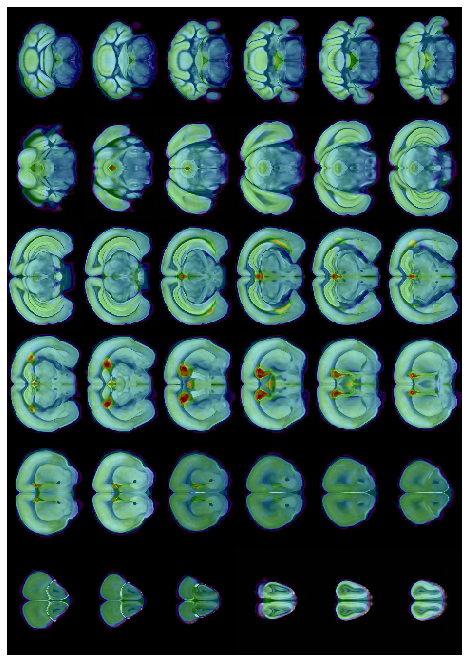

In [19]:
reg.template.plot(
    overlay=warped,
    axis=0,
    nslices=36,
    overlay_alpha=0.4,
    overlay_cmap='nipy_spectral',
)

In [20]:
isocortex = reset_ants_img(mice.allen['isocortex_mask'], dtype=float, spacing=0.1)

In [21]:
iso_inv = ants.apply_transforms(
    fixed=x,
    moving=isocortex,
    transformlist=tx['invtransforms'],
    interpolator='genericLabel',
)
iso_inv

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

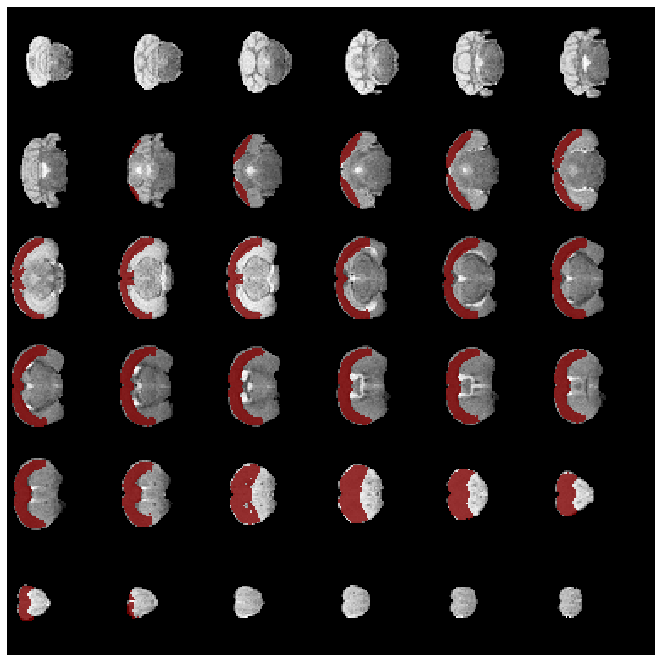

In [23]:
x.plot(
    overlay=iso_inv,
    axis=0,
    nslices=36,
    overlay_alpha=0.8,
)

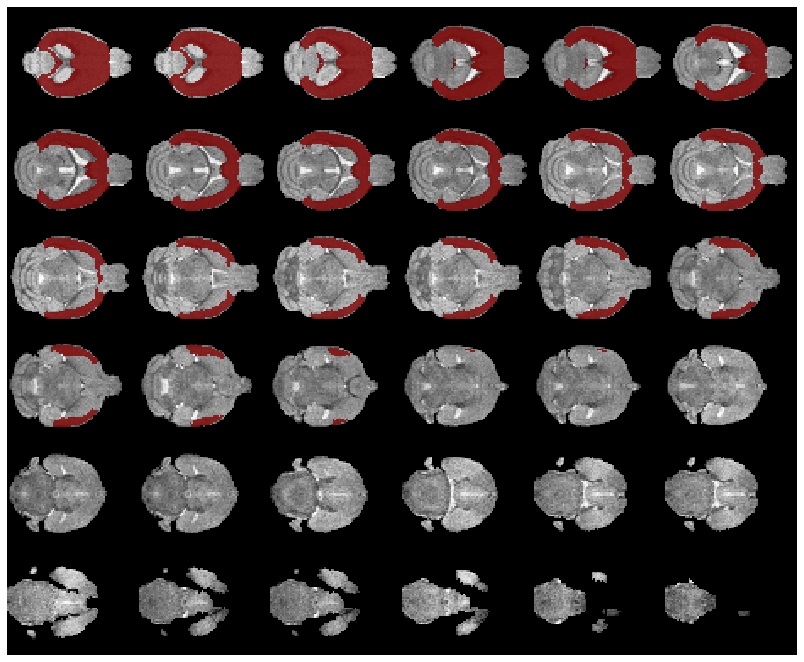

In [24]:
x.plot(
    overlay=iso_inv,
    axis=1,
    nslices=36,
    overlay_alpha=0.8,
)

## Direct register

In [8]:
x = mice.T1w[key].get_data()
x = reorient_arr(x)
x = reset_ants_img(x, spacing=0.2)
x

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [9]:
template = reset_ants_img(mice.allen['template'], dtype=float, spacing=0.1)
template

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [10]:
x[50, 10]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 6934., 8319., 8920., 8703., 8396., 9018., 7510., 7082.,
       7630., 8614., 9287., 8973., 8554., 8759., 8355., 9954., 7870.,
       7338., 8332., 7386., 7477., 8118., 8167., 7183., 8875., 7979.,
       7820., 8740., 8333., 9112., 9558., 9527., 8901., 8148., 6899.,
       6873., 8583., 8531., 8489., 9131., 6943., 5406.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.], dtype=float32)

In [11]:
seeds = [2**i for i in range(10)]

_txs = []
_perf = []
for seed in tqdm(seeds):
    tx = ants.registration(
        fixed=template,
        moving=x,
        mask=x.get_mask(),
        type_of_transform='SyN',
        verbose=True,
        grad_step=0.8,
        random_seed=seed,
    )
    warped = ants.apply_transforms(
        fixed=template,
        moving=x,
        transformlist=tx['fwdtransforms'],
        interpolator='linear',
    )
    mi = ants.image_mutual_information(template, warped)
    mi_base = ants.image_mutual_information(template, template)
    score = mi / mi_base
    print(seed, score)
    _perf.append(score)
    _txs.append(tx)

print(np.argmax(_perf), _perf[np.argmax(_perf)])

  0%|          | 0/10 [00:00<?, ?it/s]

1 0.48359473961611243

 10%|█         | 1/10 [00:24<03:40, 24.48s/it]

2 0.48326119072271173

 20%|██        | 2/10 [00:48<03:15, 24.38s/it]

4 0.4809933313765314

 30%|███       | 3/10 [01:14<02:55, 25.00s/it]

8 0.48302460352714116

 40%|████      | 4/10 [01:36<02:23, 23.98s/it]

16 0.4830285588396591

 50%|█████     | 5/10 [02:07<02:12, 26.46s/it]

32 0.4812997863541607

 60%|██████    | 6/10 [02:37<01:50, 27.60s/it]

64 0.4840579604838745

 70%|███████   | 7/10 [03:06<01:24, 28.01s/it]

128 0.48153564946183613

 80%|████████  | 8/10 [03:33<00:55, 27.69s/it]

256 0.4822008010861889

 90%|█████████ | 9/10 [04:05<00:29, 29.15s/it]

512 0.4827682308693391

100%|██████████| 10/10 [04:35<00:00, 27.59s/it]


6 0.4840579604838745

In [12]:
_perf

[
    0.48359473961611243,
    0.48326119072271173,
    0.4809933313765314,
    0.48302460352714116,
    0.4830285588396591,
    0.4812997863541607,
    0.4840579604838745,
    0.48153564946183613,
    0.4822008010861889,
    0.4827682308693391
]

In [13]:
best_tx = _txs[np.argmax(_perf)]

In [14]:
warped = ants.apply_transforms(
    fixed=template,
    moving=x,
    transformlist=best_tx['fwdtransforms'],
    interpolator='linear',
)
mi = ants.image_mutual_information(template, warped)
mi_base = ants.image_mutual_information(template, template)
mi / mi_base

0.4840579604838745

0.48275502822706456

In [15]:
isocortex = reset_ants_img(mice.allen['isocortex_mask'], dtype=float, spacing=0.1)

In [17]:
template_inv = ants.apply_transforms(
    fixed=x,
    moving=template,
    transformlist=best_tx['invtransforms'],
    interpolator='linear',
)
mi = ants.image_mutual_information(x, template_inv)
mi_base = ants.image_mutual_information(x, x)
mi / mi_base

0.5450824836918686

0.5435598943088732

In [20]:
iso_inv = ants.apply_transforms(
    fixed=x,
    moving=isocortex,
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)

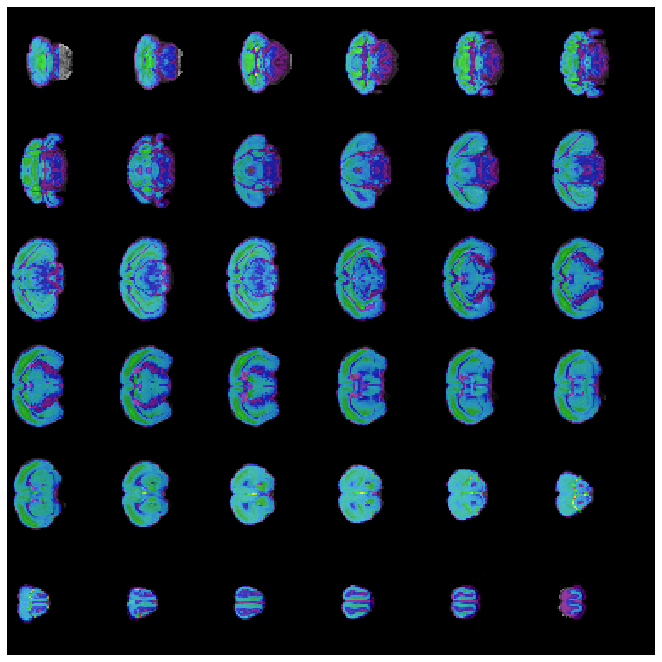

In [21]:
x.plot(
    overlay=template_inv,
    overlay_cmap='nipy_spectral',
    overlay_alpha=0.7,
    nslices=36,
)

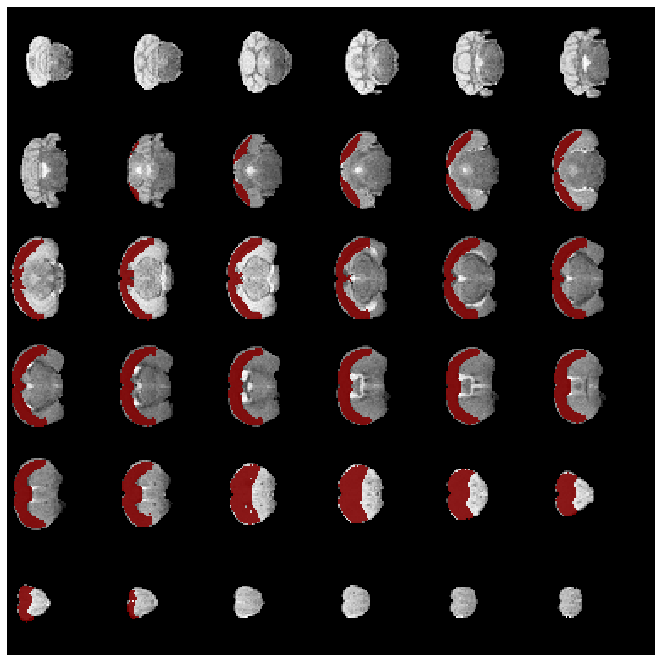

In [22]:
x.plot(
    overlay=iso_inv,
    overlay_cmap='jet',
    nslices=36,
)

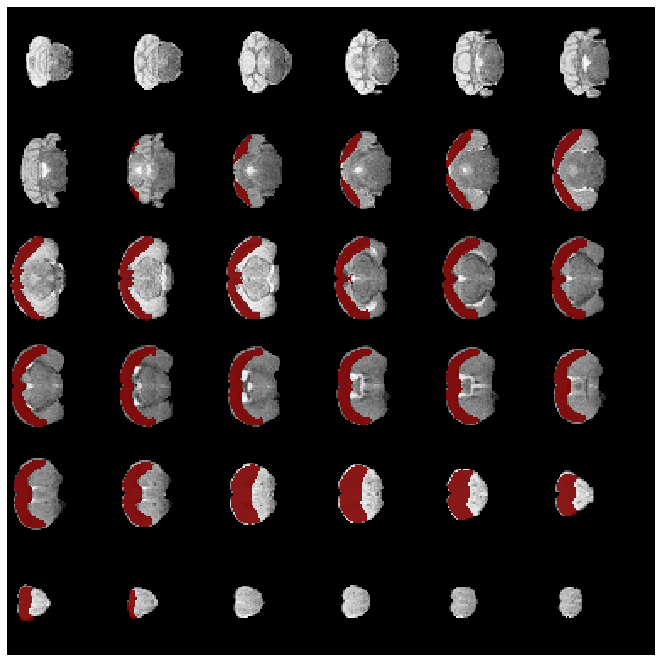

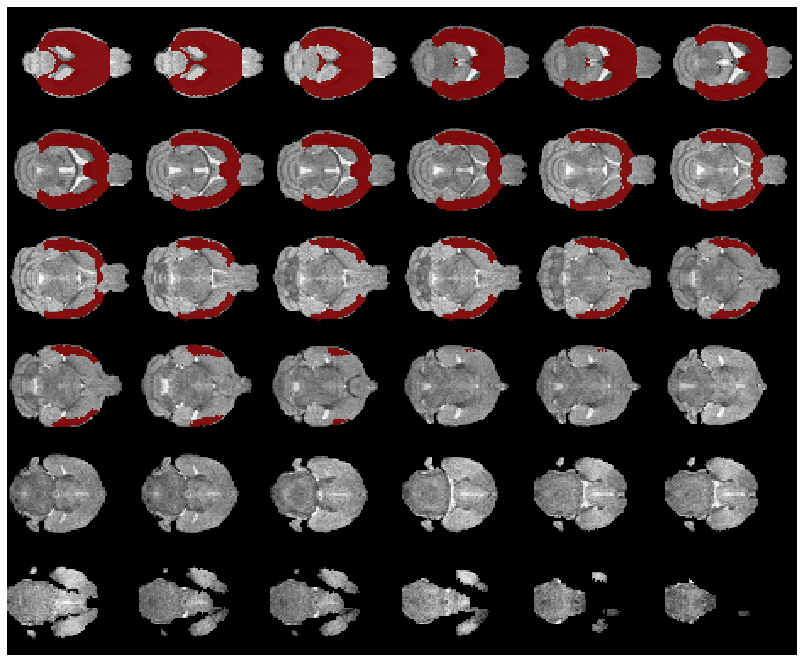

In [23]:
x.plot(
    overlay=iso_inv,
    overlay_cmap='jet',
    nslices=36,
    axis=1,
)

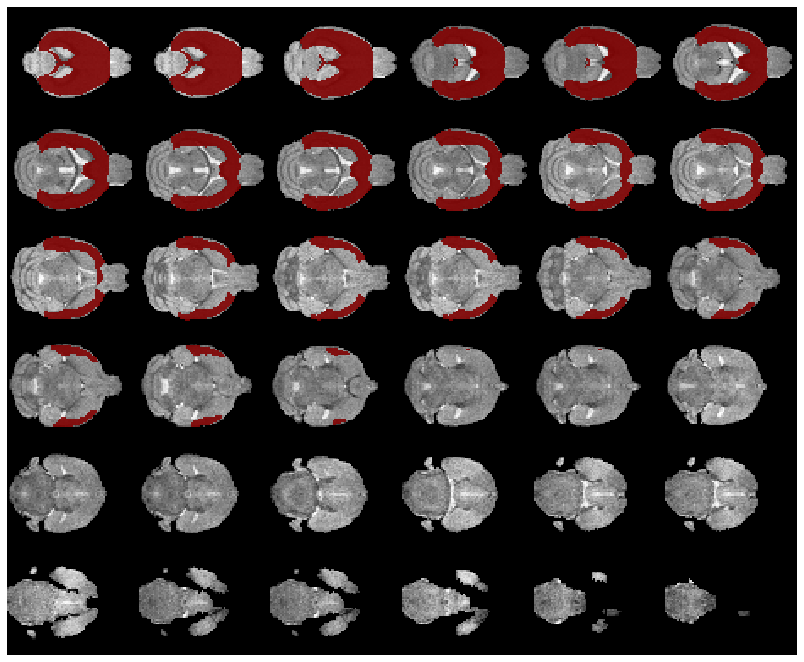

In [ ]:
template.plot(
    overlay=isocortex,
    overlay_cmap='jet',
    nslices=36,
)